In [4]:
from fastai.vision.all import *
import gradio as gr


def is_cat(x): return x[0].isupper()

/Users/joaquinlopez/miniconda3/envs/hf/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


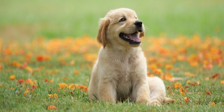

In [6]:
im = PILImage.create('dog.jpg')
im.thumbnail((224, 224))
im  

In [7]:
learn = load_learner('model.pkl')   

In [8]:
%time learn.predict(im)

CPU times: user 88.6 ms, sys: 21.7 ms, total: 110 ms
Wall time: 90.4 ms


('False', TensorBase(0), TensorBase([9.9997e-01, 2.5096e-05]))

In [9]:
categories = ('Dog', 'Cat')

def classify_image(img):
    pred, pred_idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [10]:
classify_image(im)

{'Dog': 0.9999748468399048, 'Cat': 2.5095680030062795e-05}

In [ ]:
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['dog.jpg', 'cat.jpg', 'tiger.jpg', 'wolf.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)